Question 1

In [1]:
using Plots
gr()


In [3]:
x = range(0.1, 1.0, length=21)
y = range(0.1, 1.0, length=21)
X1 = [xi for xi in x, yj in y]
X2 = [yj for xi in x, yj in y]

21×21 Matrix{Float64}:
 0.1  0.145  0.19  0.235  0.28  0.325  0.37  …  0.82  0.865  0.91  0.955  1.0
 0.1  0.145  0.19  0.235  0.28  0.325  0.37     0.82  0.865  0.91  0.955  1.0
 0.1  0.145  0.19  0.235  0.28  0.325  0.37     0.82  0.865  0.91  0.955  1.0
 0.1  0.145  0.19  0.235  0.28  0.325  0.37     0.82  0.865  0.91  0.955  1.0
 0.1  0.145  0.19  0.235  0.28  0.325  0.37     0.82  0.865  0.91  0.955  1.0
 0.1  0.145  0.19  0.235  0.28  0.325  0.37  …  0.82  0.865  0.91  0.955  1.0
 0.1  0.145  0.19  0.235  0.28  0.325  0.37     0.82  0.865  0.91  0.955  1.0
 0.1  0.145  0.19  0.235  0.28  0.325  0.37     0.82  0.865  0.91  0.955  1.0
 0.1  0.145  0.19  0.235  0.28  0.325  0.37     0.82  0.865  0.91  0.955  1.0
 0.1  0.145  0.19  0.235  0.28  0.325  0.37     0.82  0.865  0.91  0.955  1.0
 0.1  0.145  0.19  0.235  0.28  0.325  0.37  …  0.82  0.865  0.91  0.955  1.0
 0.1  0.145  0.19  0.235  0.28  0.325  0.37     0.82  0.865  0.91  0.955  1.0
 0.1  0.145  0.19  0.235  0.28  0.325  0.

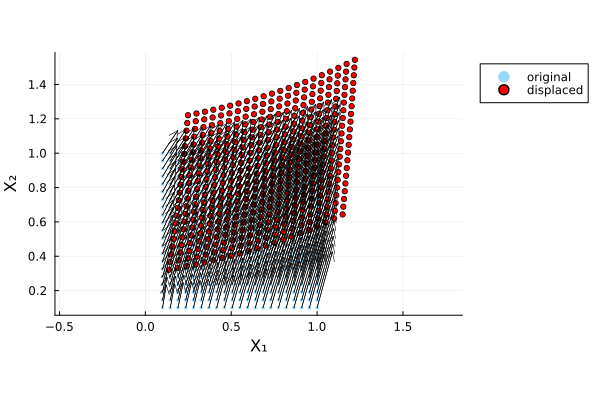

In [23]:
xs = vec(X1)  
ys = vec(X2)
u1 = 0.2 .* log.(1 .+ xs .+ ys)
u2 = 0.2 .* exp.(xs)
xp = xs .+ u1
yp = ys .+ u2
p =scatter(xs, ys;
            markerstrokewidth=0, markersize=2, alpha=0.4, label="original",
            xlabel="X₁", ylabel="X₂")
scatter!(xp, yp; markersize=3, color=:red, label="displaced")
sf = 0.6
quiver!(xs, ys, quiver=(sf .* u1, sf .* u2), color=:black, lw=0.6, label="displacement vectors")
plot!(aspect_ratio=:equal, legend=:outertopright, grid=true)
savefig("displaced_body.png")
display(p)


Question 2

In [29]:
using Plots

In [30]:
R_vals = range(1.0, 2.0, length=25)
θ_vals = range(0, 2π, length=40)

0.0:0.16110731556870733:6.283185307179586

In [39]:
function deform_point(R, θ)
    u_r = 0.4 * (R - 1)^2 * cos(3θ)
    u_θ = 0.4 * (R - 1)^3
    e_r  = [cos(θ), sin(θ)]
    e_θ = [-sin(θ), cos(θ)]
    X = [R*cos(θ), R*sin(θ)]
    x = X + u_r*e_r + u_θ*e_θ
    return x[1], x[2]
end
radial_x = []
radial_y = []

Any[]

In [32]:
circle_x = []
circle_y = []

for R in R_vals
    xs = Float64[]
    ys = Float64[]
    for θ in θ_vals
        x,y = deform_point(R, θ)
        push!(xs, x)
        push!(ys, y)
    end
    push!(circle_x, xs)
    push!(circle_y, ys)
end

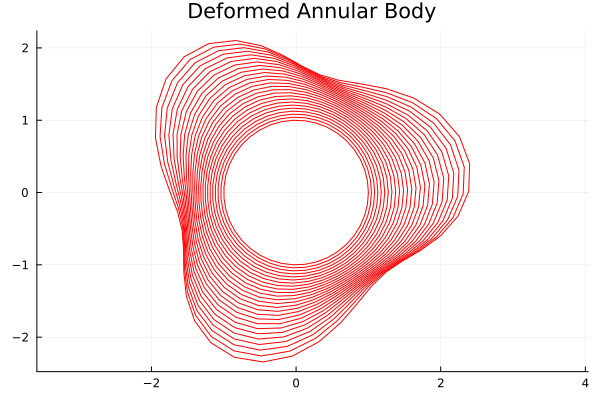

In [33]:
plot(aspect_ratio=:equal, legend=false, title="Deformed Annular Body")
for i in 1:length(radial_x)
    plot!(radial_x[i], radial_y[i], color=:blue)
end
for i in 1:length(circle_x)
    plot!(circle_x[i], circle_y[i], color=:red)
end
plot!()

In [34]:
savefig("Q2")

"C:\\Users\\HP\\Q2.png"

Question 3


In [35]:
using LinearAlgebra
using Plots

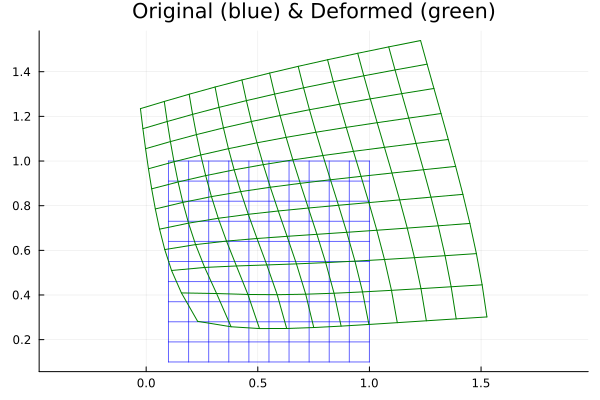

In [37]:


function Deformed(; n_rays=11, n_lines=11)
    x1 = range(0.1, stop=1.0, length=n_rays)
    x2 = range(0.1, stop=1.0, length=n_lines)

    plt = plot(aspect_ratio=:equal, legend=false, title="Original (blue) & Deformed (green)")

    for X1 in x1
        xs = [X1 for _ in x2]; ys = collect(x2)
        plot!(plt, xs, ys, color=:blue, alpha=0.6, linewidth=1)
    end
    for X2 in x2
        xs = collect(x1); ys = [X2 for _ in x1]
        plot!(plt, xs, ys, color=:blue, alpha=0.6, linewidth=1)
    end

    for X1 in x1
        xs = Float64[]; ys = Float64[]
        for X2 in x2
            R = sqrt(X1^2 + X2^2)
            θ = atan(X2, X1)
            ur = 0.2 * exp(X1)
            uθ = 0.2 * log(1 + X1 + X2)
            er = [cos(θ), sin(θ)]; eθ = [-sin(θ), cos(θ)]
            X = [X1, X2]
            uvec = ur*er + uθ*eθ
            x = X .+ uvec
            push!(xs, x[1]); push!(ys, x[2])
        end
        plot!(plt, xs, ys, color=:green, linewidth=1)
    end

    for X2 in x2
        xs = Float64[]; ys = Float64[]
        for X1 in x1
            R = sqrt(X1^2 + X2^2)
            θ = atan(X2, X1)
            ur = 0.2 * exp(X1)
            uθ = 0.2 * log(1 + X1 + X2)
            er = [cos(θ), sin(θ)]; eθ = [-sin(θ), cos(θ)]
            X = [X1, X2]
            uvec = ur*er + uθ*eθ
            x = X .+ uvec
            push!(xs, x[1]); push!(ys, x[2])
        end
        plot!(plt, xs, ys, color=:green, linewidth=1)
    end

    display(plt)
end
Deformed()


In [38]:
savefig("Q3")

"C:\\Users\\HP\\Q3.png"

Question 4


In [54]:
using LinearAlgebra
using SparseArrays
using Printf
using DelimitedFiles
W = 1000.0
H = 400.0
r = 75.0
cx, cy = W/2, H/2

mesh_size = 8.0    
E = 210000.0
ν = 0.3
thickness = 2.0
traction = 100.0  
nx = Int(round(W/mesh_size)); ny = Int(round(H/mesh_size))
nx = max(nx,4); ny = max(ny,4)
dx = W/nx; dy = H/ny

nodeId(i,j) = 1 + i + (nx+1)*j
num_nodes = (nx+1)*(ny+1)
num_elems = nx*ny

coords = Array{Float64,2}(undef, num_nodes, 2)
for j in 0:ny
    for i in 0:nx
        nid = nodeId(i,j)
        coords[nid,1] = i * dx
        coords[nid,2] = j * dy
    end
end

elems = Array{Int,2}(undef, num_elems, 4)
e = 1
for j in 0:ny-1
    for i in 0:nx-1
        n1 = nodeId(i,j); n2 = nodeId(i+1,j)
        n3 = nodeId(i+1,j+1); n4 = nodeId(i,j+1)
        elems[e,1] = n1
        elems[e,2] = n2
        elems[e,3] = n3
        elems[e,4] = n4
        e += 1
    end
end
cell_centers = Array{Float64,2}(undef, num_elems, 2)
mask = trues(num_elems)
for k in 1:num_elems
    n = elems[k,:]
    xc = (coords[n[1],1] + coords[n[2],1] + coords[n[3],1] + coords[n[4],1]) / 4.0
    yc = (coords[n[1],2] + coords[n[2],2] + coords[n[3],2] + coords[n[4],2]) / 4.0
    cell_centers[k,1] = xc; cell_centers[k,2] = yc
    if (xc - cx)^2 + (yc - cy)^2 < r^2
        mask[k] = false
    end
end

@printf("Mesh: nx=%d ny=%d  nodes=%d  elems=%d  masked=%d\n",
        nx, ny, num_nodes, num_elems, count(x->!x, mask))
C = E / (1 - ν^2)
D = C * [1.0 ν 0.0;
         ν 1.0 0.0;
         0.0 0.0 (1-ν)/2.0]
g = (-1/sqrt(3), 1/sqrt(3))
gw = (1.0, 1.0)

dN_dxi(ξ,η)  = [-(1-η)/4, (1-η)/4, (1+η)/4, -(1+η)/4]
dN_deta(ξ,η) = [-(1-ξ)/4, -(1+ξ)/4, (1+ξ)/4, (1-ξ)/4]
function elem_stiffness(coords4)
    Ke = zeros(8,8)
    for iξ in 1:2, iη in 1:2
        ξ = g[iξ]; η = g[iη]
        dNξ = dN_dxi(ξ,η)
        dNη = dN_deta(ξ,η)
        J = zeros(2,2)
        for a in 1:4
            J[1,1] += dNξ[a] * coords4[a,1]
            J[1,2] += dNη[a] * coords4[a,1]
            J[2,1] += dNξ[a] * coords4[a,2]
            J[2,2] += dNη[a] * coords4[a,2]
        end
        detJ = det(J)
        invJ = inv(J)
        B = zeros(3,8)
        for a in 1:4
            d = invJ * [dNξ[a], dNη[a]]
            dNx = d[1]; dNy = d[2]
            B[1,2*a-1] = dNx
            B[2,2*a  ] = dNy
            B[3,2*a-1] = dNy
            B[3,2*a  ] = dNx
        end
        weight = gw[iξ] * gw[iη]
        Ke .+= thickness * (B' * D * B) * detJ * weight
    end
    return Ke
end
ndof = 2 * num_nodes
K = spzeros(ndof, ndof)
f = zeros(ndof)

for elem in 1:num_elems
    if !mask[elem]; continue; end
    n = elems[elem, :]
    coords4 = zeros(4,2)
    for a in 1:4
        coords4[a,1] = coords[n[a],1]; coords4[a,2] = coords[n[a],2]
    end
    Ke = elem_stiffness(coords4)
    dofs = Vector{Int}(undef,8)
    for a in 1:4
        dofs[2*a-1] = 2*(n[a]-1) + 1
        dofs[2*a]   = 2*(n[a]-1) + 2
    end
    for i in 1:8, j in 1:8
        K[dofs[i], dofs[j]] += Ke[i,j]
    end
end
for j in 0:ny-1
    n_bottom = nodeId(nx, j)
    n_top    = nodeId(nx, j+1)
    Lseg = abs(coords[n_top,2] - coords[n_bottom,2])
    fx = traction * Lseg * thickness / 2.0
    f[2*(n_bottom-1)+1] += fx
    f[2*(n_top-1)+1]    += fx
end
active = falses(num_nodes)
for elem in 1:num_elems
    if mask[elem]
        for a in 1:4
            active[elems[elem,a]] = true
        end
    end
end

fixed = Dict{Int,Float64}()
for nid in 1:num_nodes
    if !active[nid]
        fixed[2*(nid-1)+1] = 0.0
        fixed[2*(nid-1)+2] = 0.0
    end
end

for j in 0:ny
    nid = nodeId(0,j)
    fixed[2*(nid-1)+1] = 0.0
end

fixed[2*(nodeId(0,0)-1)+2] = 0.0

for (d,val) in fixed
    K[d, :] .= 0.0
    K[:, d] .= 0.0
    K[d, d] = 1.0
    f[d] = val
end

for i in 1:ndof
    if abs(K[i,i]) < 1e-16
        K[i,i] = K[i,i] + 1e-12
    end
end
println("Solving linear system: ndof = $ndof  nnz(K) = $(nnz(K))")
u = K \ f
vm_elem = fill(NaN, num_elems)
for elem in 1:num_elems
    if !mask[elem]; continue; end
    n = elems[elem,:]
    coords4 = zeros(4,2)
    ue = zeros(8)
    for a in 1:4
        coords4[a,1] = coords[n[a],1]; coords4[a,2] = coords[n[a],2]
        ue[2*a-1] = u[2*(n[a]-1)+1]; ue[2*a] = u[2*(n[a]-1)+2]
    end
    ξ=0.0; η=0.0
    dNξ = dN_dxi(ξ,η); dNη = dN_deta(ξ,η)
    J = zeros(2,2)
    for a in 1:4
        J[1,1] += dNξ[a]*coords4[a,1]; J[1,2] += dNη[a]*coords4[a,1]
        J[2,1] += dNξ[a]*coords4[a,2]; J[2,2] += dNη[a]*coords4[a,2]
    end
    invJ = inv(J)
    B = zeros(3,8)
    for a in 1:4
        dxy = invJ * [dNξ[a], dNη[a]]
        dNx, dNy = dxy
        B[1,2*a-1] = dNx; B[2,2*a] = dNy; B[3,2*a-1] = dNy; B[3,2*a] = dNx
    end
    ve = B * ue
    σv = D * ve
    sxx, syy, sxy = σv[1], σv[2], σv[3]
    vm_elem[elem] = sqrt(sxx^2 + syy^2 - sxx*syy + 3*sxy^2)
end
valid_idx = [i for i in 1:num_elems if mask[i]]
valid_vm = vm_elem[valid_idx]
vm_max = maximum(valid_vm)
locs = [ valid_idx[i] for i in findall(x->isapprox(x, vm_max; atol=1e-8), valid_vm) ]

println("\n=== RESULTS ===")
println("Max von Mises (cell-centered) = ", vm_max, " N/mm^2")
println("Element index(es): ", locs)
for ei in locs
    println(" center = (", cell_centers[ei,1], ", ", cell_centers[ei,2], ")")
end
println("Estimated Kt (σ_max / σ_nom where σ_nom=50) = ", vm_max / 50.0)
center_y = H/2
tol = dy/2 + 1e-9
xs = Float64[]; sigx = Float64[]
for elem in 1:num_elems
    if !mask[elem]; continue; end
    xc = cell_centers[elem,1]; yc = cell_centers[elem,2]
    if abs(yc - center_y) <= tol
        n = elems[elem,:]
        coords4 = zeros(4,2); ue = zeros(8)
        for a in 1:4
            coords4[a,1] = coords[n[a],1]; coords4[a,2] = coords[n[a],2]
            ue[2*a-1] = u[2*(n[a]-1)+1]; ue[2*a] = u[2*(n[a]-1)+2]
        end
        ξ=0.0; η=0.0
        dNξ = dN_dxi(ξ,η); dNη = dN_deta(ξ,η)
        J=zeros(2,2)
        for a in 1:4
            J[1,1]+=dNξ[a]*coords4[a,1]; J[1,2]+=dNη[a]*coords4[a,1]
            J[2,1]+=dNξ[a]*coords4[a,2]; J[2,2]+=dNη[a]*coords4[a,2]
        end
        invJ = inv(J)
        B=zeros(3,8)
        for a in 1:4
            dxy = invJ * [dNξ[a], dNη[a]]
            B[1,2*a-1] = dxy[1]; B[2,2*a] = dxy[2]; B[3,2*a-1] = dxy[2]; B[3,2*a] = dxy[1]
        end
        ve = B * ue; σv = D * ve
        push!(xs, xc); push!(sigx, σv[1])
    end
end

if !isempty(xs)
    idx = sortperm(xs)
    data = hcat([xs[i] for i in idx], [sigx[i] for i in idx])
    writedlm("centerline_sigmax.csv", data, ',')
    println("Wrote centerline_sigmax.csv with ", size(data,1), " samples")
end

println("Done.")


Mesh: nx=125 ny=50  nodes=6426  elems=6250  masked=274
Solving linear system: ndof = 12852  nnz(K) = 218156

=== RESULTS ===
Max von Mises (cell-centered) = 320.12330257644436 N/mm^2
Element index(es): [1941, 4316]
 center = (524.0, 124.0)
 center = (524.0, 276.0)
Estimated Kt (σ_max / σ_nom where σ_nom=50) = 6.402466051528887
Wrote centerline_sigmax.csv with 212 samples
Done.


Question 5

In [56]:
L = 1000.0            
H = 200.0             
thickness = 250.0     
E = 25000.0           
ν = 0.2
P = 1000.0            
q = -P / H            
nx = 120
ny = 24

nnode_x = nx + 1
nnode_y = ny + 1
n_nodes = nnode_x * nnode_y
n_elem = nx * ny
ndof = 2 * n_nodes

println("Mesh: $n_nodes nodes, $n_elem elements")
node_coords = zeros(n_nodes, 2)
xs = range(0.0, L, length=nnode_x)
ys = range(0.0, H, length=nnode_y)

for j in 1:nnode_y
    for i in 1:nnode_x
        nid = (j-1)*nnode_x + i
        node_coords[nid,1] = xs[i]
        node_coords[nid,2] = ys[j]
    end
end
elems = Array{Int}(undef, n_elem, 4)
e = 1
for j in 1:ny
    for i in 1:nx
        n1 = (j-1)*nnode_x + i
        n2 = n1 + 1
        n3 = n2 + nnode_x
        n4 = n1 + nnode_x
        elems[e,:] = [n1,n2,n3,n4]
        e += 1
    end
end
D = (E/(1-ν^2))*[
    1.0   ν     0.0
    ν     1.0   0.0
    0.0   0.0  (1.0-ν)/2
]
g = 1/sqrt(3)
gps = [(-g,-g),(g,-g),(g,g),(-g,g)]

function dshape_Q4(xi,eta)
    dN = zeros(4,2)
    dN[1,:] = [ -0.25*(1-eta),  -0.25*(1-xi) ]
    dN[2,:] = [  0.25*(1-eta),  -0.25*(1+xi) ]
    dN[3,:] = [  0.25*(1+eta),   0.25*(1+xi) ]
    dN[4,:] = [ -0.25*(1+eta),   0.25*(1-xi) ]
    return dN
end
K = zeros(ndof, ndof)
F = zeros(ndof)

println("Assembling stiffness matrix...")
for el in 1:n_elem
    conn = elems[el,:]
    xe = node_coords[conn,1]
    ye = node_coords[conn,2]

    ke = zeros(8,8)

    for (xi,eta) in gps
        dN = dshape_Q4(xi,eta)

        # Jacobian
        J = zeros(2,2)
        for a in 1:4
            J[1,1] += dN[a,1]*xe[a]
            J[1,2] += dN[a,2]*xe[a]
            J[2,1] += dN[a,1]*ye[a]
            J[2,2] += dN[a,2]*ye[a]
        end

        detJ = det(J)
        invJ = inv(J)

        B = zeros(3,8)
        for a in 1:4
            dNd = invJ * dN[a,:]
            B[1,2a-1] = dNd[1]
            B[2,2a]   = dNd[2]
            B[3,2a-1] = dNd[2]
            B[3,2a]   = dNd[1]
        end

        ke += B' * D * B * detJ * thickness
    end
    dofmap = [
        2*(conn[1]-1)+1, 2*(conn[1]-1)+2,
        2*(conn[2]-1)+1, 2*(conn[2]-1)+2,
        2*(conn[3]-1)+1, 2*(conn[3]-1)+2,
        2*(conn[4]-1)+1, 2*(conn[4]-1)+2
    ]

    for i in 1:8, j in 1:8
        K[dofmap[i], dofmap[j]] += ke[i,j]
    end
end

println("Stiffness assembly complete.")
println("Applying distributed traction...")

for j in 1:ny
    n_bottom = (j-1)*nnode_x + nnode_x
    n_top    = j*nnode_x

    y1 = node_coords[n_bottom,2]
    y2 = node_coords[n_top,2]
    Ledge = abs(y2 - y1)

    f1 = q * Ledge * thickness / 2
    f2 = q * Ledge * thickness / 2

    F[2*(n_bottom-1)+2] += f1
    F[2*(n_top-1)+2]   += f2
end
top_right = (nnode_y-1)*nnode_x + nnode_x
F[2*(top_right-1)+2] += q * thickness * (H/ny) / 2

println("Traction applied.")
fixed = falses(ndof)

for nid in 1:n_nodes
    if abs(node_coords[nid,1]) < 1e-8
        fixed[2*(nid-1)+1] = true
        fixed[2*(nid-1)+2] = true
    end
end

free = findall(!, fixed)
println("Free DOFs: ", length(free))
println("Solving system...")
u_free = K[free,free] \ F[free]
U = zeros(ndof)
U[free] = u_free

println("Solve complete.")
uy_tip = U[2*(top_right-1)+2]
println("Vertical displacement at free top corner = $uy_tip mm")
println("Writing VTK file...")

function writeVTK(filename)
    open(filename,"w") do io
        println(io,"# vtk DataFile Version 2.0")
        println(io,"Cantilever Q4 FEM result")
        println(io,"ASCII")
        println(io,"DATASET UNSTRUCTURED_GRID")
        println(io,"POINTS $n_nodes float")
        for i in 1:n_nodes
            x = node_coords[i,1]
            y = node_coords[i,2]
            println(io,"$x $y 0.0")
        end
        total = n_elem * 5
        println(io,"CELLS $n_elem $total")
        for el in 1:n_elem
            conn = elems[el,:] .- 1
            println(io,"4 $(conn[1]) $(conn[2]) $(conn[3]) $(conn[4])")
        end

        println(io,"CELL_TYPES $n_elem")
        for i in 1:n_elem
            println(io,"9")   # quad
        end
        println(io,"POINT_DATA $n_nodes")
        println(io,"VECTORS displacement float")
        for i in 1:n_nodes
            ux = U[2*(i-1)+1]
            uy = U[2*(i-1)+2]
            println(io,"$ux $uy 0.0")
        end
    end
end

writeVTK("cantilever.vtk")
println("VTK written to cantilever.vtk")

println("DONE.")


Mesh: 3025 nodes, 2880 elements
Assembling stiffness matrix...
Stiffness assembly complete.
Applying distributed traction...
Traction applied.
Free DOFs: 6000
Solving system...
Solve complete.
Vertical displacement at free top corner = -0.43314690440969833 mm
Writing VTK file...
VTK written to cantilever.vtk
DONE.


Question 6

In [57]:
using Gridap
L = 1000.0  
W = 250.0   
H = 200.0   
h = 25.0    
domain = (0, L, 0, W, 0, H)
partition = (round(Int, L/h), round(Int, W/h), round(Int, H/h))
model = CartesianDiscreteModel(domain, partition)
labels = get_face_labeling(model)
add_tag_from_tags!(labels, "FixedSurface", [1])
add_tag_from_tags!(labels, "TopSurface", [6])
writevtk(model, "cantilever_beam_model", labels=labels)

println("Mesh generation complete. 'cantilever_beam_model.vtu' created.")
println("Gridap model info:")
println(model)



Mesh generation complete. 'cantilever_beam_model.vtu' created.
Gridap model info:
CartesianDiscreteModel()
